- 조건탐색
-
- 인코딩
-

In [ ]:
import numpy as np
import pandas as pd
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1, columns=list('abcde'))
df2 = pd.DataFrame(data2, columns=list('dehi'))
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [ ]:
# con1 = pd.concat([df1,df2], axis = 0)
con1 = pd.concat([df1,df2], axis = 0, ignore_index = True)
con1

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [ ]:
con1 = pd.concat([df1,df2], axis = 1)
con1

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
df1['ind'] = [1,2,3,4]
df1

,a,b,c,d,e,ind
0,1,2,3,4,5,1
1,6,7,8,9,10,2
2,11,12,13,14,15,3
3,16,17,18,19,20,4


In [ ]:
df2['ind'] = [1,2,3,4,5]
df2

,d,e,h,i,ind
0,11,12,13,14,1
1,15,16,17,18,2
2,19,20,21,22,3
3,23,24,25,26,4
4,27,28,29,30,5


* merge() 함수는 sql의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합한는 개념
* 기준이 되는 열이나 인덱스를 키라고 부름
* 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재함

In [ ]:
# merge() 를 이용한 결합

pd.merge(df1, df2, on = 'ind', how = 'outer')
pd.merge(df1, df2, on = 'ind')  # default 는 inner


,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


In [ ]:
df1 = df1.drop('ind', axis = 1)
df2 = df2.drop('ind', axis = 1)
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


* 판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷
* join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge와 차이가 있으나 on=keys 옵션 설정하면 열을 기준으로 결합

In [ ]:
# join은 인덱스 기준으로 결합 (default는 교집합)
# df1.join(df2,lsuffix = '_1', rsuffix = '_2')

df1.join(df2,lsuffix = '_1', rsuffix = '_2', how = 'inner')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [ ]:
df1.join(df2,lsuffix = '_1', rsuffix = '_2', how = 'outer')

,a,b,c,d_1,e_1,d_2,e_2,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [ ]:
import pandas as pd

# 주식 데이터를 가져와서 데이터프레임 만들기
filepath1 = '/content/drive/MyDrive/dataset/stock price.xlsx'
filepath2 = '/content/drive/MyDrive/dataset/stock valuation.xlsx'

df1 = pd.read_excel(filepath1, engine = 'openpyxl', index_col = 'id')
df2 = pd.read_excel(filepath2, engine = 'openpyxl', index_col = 'id')

print(df1,'\n')
print(df2)

       stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475 

             name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990        삼양사   5741.000000  108090  14.283226  0.758627
161390      한국타이어   5648.500000   51341   7.453306  0.820007
181710  NHN엔터테인먼트 

In [ ]:
# 데이터프레임 결합(join)
# df1의 행 인덱스를 기준으로 결합하는 how = 'left' 옵션이 기본 적용

df3 = df1.join(df2)
print(df3)

       stock_name          value   price    name           eps       bps  \
id                                                                         
128940       한미약품   59385.666667  421000     NaN           NaN       NaN   
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068.0   
138250      엔에스쇼핑   14558.666667   13200     NaN           NaN       NaN   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780.0   
142280     녹십자엠에스     468.833333   10200     NaN           NaN       NaN   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090.0   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684.0   
192400      쿠쿠홀딩스  179204.666667  177500     NaN           NaN       NaN   
199800         툴젠   -2514.333333  115400     NaN           NaN       NaN   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335.0   

              per       pbr  
id                           
128940        NaN       NaN

In [ ]:
df4 = df1.join(df2, how = 'right')
print(df4)

       stock_name          value     price       name           eps     bps  \
id                                                                            
130960     CJ E&M   58540.666667   98900.0     CJ E&M   6301.333333   54068   
136480        NaN            NaN       NaN         하림    274.166667    3551   
138040        NaN            NaN       NaN    메리츠금융지주   2122.333333   14894   
139480        이마트  239230.833333  254500.0        이마트  18268.166667  295780   
145990        삼양사   82750.000000   82000.0        삼양사   5741.000000  108090   
161390        NaN            NaN       NaN      한국타이어   5648.500000   51341   
181710        NaN            NaN       NaN  NHN엔터테인먼트   2110.166667   78434   
185750        종근당   40293.666667  100500.0        종근당   3990.333333   40684   
204210     모두투어리츠    3093.333333    3475.0     모두투어리츠     85.166667    5335   
207940        NaN            NaN       NaN   삼성바이오로직스   4644.166667   60099   

              per       pbr  
id                   

In [ ]:
# 데이터프레임 결합(join) - 교집합
# 두 데이터프레임에 공통으로 존재하는 행 인덱스를 기준으로 추출

df4 = df1.join(df2, how = 'inner')
print(df4)

       stock_name          value   price    name           eps     bps  \
id                                                                       
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335   

              per       pbr  
id                           
130960  15.695091  1.829178  
139480  13.931338  0.860437  
145990  14.283226  0.758627  
185750  25.185866  2.470259  
204210  40.802348  0.651359  


In [ ]:
df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [ ]:
# Q. df4 에서 중복된 칼럼을 삭제한 후 블린 인덱싱을 이용하여 eps가 3000보다 적거나 stock_name 이 이마트인
# 데이터를 선택하여 데이터프레임을 생성하고 df5 이름으로 저장 및 출력 (단 < 와 == 를 반드시 사용)

df4.drop('name', axis = 1, inplace = True)
df5 = df4[(df4['eps'] < 3000) | (df4['stock_name'] == '이마트')]
df5

,stock_name,value,price,eps,bps,per,pbr
id,,,,,,,
139480,이마트,239230.833333,254500,18268.166667,295780,13.931338,0.860437
204210,모두투어리츠,3093.333333,3475,85.166667,5335,40.802348,0.651359


In [ ]:
import numpy as np
# np.random.seed(0)

data = np.arange(20).reshape(4,5)

df = pd.DataFrame(data, columns = ['a','b','c','d','e'])
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df1 = df.copy()
print(df1,'\n')
df1.drop(df1.index[0])

    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19 



,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df1.copy()
df1.index[0]
df1.drop(3)

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [ ]:
idx = df1[df1.a > 10].index
print(idx,'\n')
df1.drop(idx)

Index([3], dtype='int64') 



,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


In [ ]:
cond1 = df.a > 10
cond2 = df.b == 16
cond3 = df.e > 15

df[cond1 & cond2 & cond3]

,a,b,c,d,e
3,15,16,17,18,19


In [ ]:
cond1 = df.a > 5
cond2 = df.b == 15
cond3 = df.e > 5

df[cond1 | cond2 | cond3]

,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df[cond1]
df[cond1][['a','b']]

,a,b
2,10,11
3,15,16


In [ ]:
import seaborn as sns

df = sns.load_dataset('titanic')

tdf = df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
tdf.rename(columns = {'sex': 'gender', 'fare': 'ticket'}, inplace = True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 값 변경(임시 저장)

# df.sex.replace({'female':1, 'male': 0}, implace = True)
df1 = tdf[['gender']].replace(['female','male'],[1,0])
df1.gender.value_counts()

gender
0    577
1    314
Name: count, dtype: int64

In [ ]:
# 값 변경 (원본 반영)
tdf1 = tdf.copy()
tdf1.gender.replace({'female':1, 'male': 0}, inplace = True)
tdf1.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 컬럼 대문자 변경

tdf.rename(str.upper, axis = 'columns', inplace = True)
tdf.head()

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 컬럼 소문자 변경

tdf.rename(str.lower, axis = 'columns', inplace = True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df2 = df.copy()

In [ ]:
# 컬럼 순서변경

columns_customed = ['pclass','sex','age','survived']
df2[columns_customed].head()

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [ ]:
tdf1 = tdf[['age','ticket']].head()
tdf1

,age,ticket
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
tdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     5 non-null      float64
 1   ticket  5 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes


In [ ]:
# Dtype 변경
tdf1 = tdf1.astype({'age':'int','ticket': 'int'})
tdf1

,age,ticket
0,22,7
1,38,71
2,26,7
3,35,53
4,35,8


In [ ]:
# age 컬럼의 값 구성체크

age_counts_sorted = tdf.age.value_counts()
age_counts_sorted.sort_index()

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

In [ ]:
# age 컬럼의 고유 구성 요소

len(tdf.age.unique())
tdf.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
def get_category(age):
'Baby', 'Child', 'Teenager','Young Adult','Adult','Elderly'

In [ ]:
# age 컬럼 범주화

def get_category(age):

    if age < 5:
        return 'Baby'
    elif age < 10:
        return 'Child'
    elif age < 20:
        return 'Teenager'
    elif age < 30:
        return 'Young Adult'
    elif age < 40:
        return 'Adult'
    else:
        return 'Elderly'

tdf['age_cat'] = tdf.age.apply(lambda x : get_category(x))
tdf[['age', 'age_cat']].head()


,age,age_cat
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Adult
4,35.0,Adult


In [ ]:
category = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
ages = tdf.age.fillna(0).values
tdf['cat'] = pd.cut(ages, bins = [0,1,10,25,35,50,100], labels = category)
tdf[['age','cat']].head()

,age,cat
0,22.0,Teenager
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


범주형 데이터를 수치형 데이터로 변환
- Label Encoding은 각 범주형 값을 고유한 정수로 변환. 이 방법은 범주형 변수에 순서나 순위가 있을 때 유용
- One-Hot Encoding은 각 범주형 값을 이진 벡터로 변환. 이 방법은 범주형 변수에 순서나 순위가 없을 때 유용

In [ ]:
tdf.gender.value_counts()

gender
male      577
female    314
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['gender', 'age']

for feature in features:
    tdf[feature] = le.fit_transform(tdf[feature])

tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat,cat
0,0,3,1,28,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult,Teenager
1,1,1,0,51,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,Adult
2,1,3,0,34,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult,Young Adult
3,1,1,0,47,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,Young Adult
4,0,3,1,47,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,Young Adult


In [ ]:
tdf2 = tdf[['gender','class']]
tdf2.head()

,gender,class
0,1,Third
1,0,First
2,0,Third
3,0,First
4,1,Third


In [ ]:
import pandas as pd

pd.get_dummies(tdf2).head()

,gender,class_First,class_Second,class_Third
0,1,False,False,True
1,0,True,False,False
2,0,False,False,True
3,0,True,False,False
4,1,False,False,True


Pandas는 주로 Matplotlib 라이브러리를 기반으로 하여 시각화를 구현하며, 간단한 코드로 다양한 그래프를 생성

[ 주요 시각화 함수 ]

plot(): 기본적인 시각화 함수를 제공하며, 다양한 종류의 그래프를 그릴 수 있다.

kind 매개변수를 통해 그래프의 종류를 지정할 수 있다. (line, bar, barh, hist, box, kde, density, area, pie, scatter, hexbin 등)

- hist(): 히스토그램을 생성.
- boxplot(): 박스 플롯을 생성.
- scatter_matrix(): 여러 변수 간의 산점도 행렬을 생성.
- plot.scatter(): 산점도를 생성.
- plot.bar(): 막대 그래프를 생성.
- plot.kde(): 커널 밀도 추정 그래프를 생성.

In [ ]:
import pandas as pd
import numpy as np

ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2020', periods = 1000))
ts1 = ts.cumsum()
df = pd.DataFrame({'value': ts, 'cum': ts1})
df.head()

,value,cum
2020-01-01,-1.147214,-1.147214
2020-01-02,1.387364,0.240150
2020-01-03,0.148248,0.388398
2020-01-04,-0.399912,-0.011515
2020-01-05,0.543587,0.532072


In [ ]:
num = np.random.randn(1000)
mean_val = ts.mean()
std_dev = ts.std()
print(mean_val, std_dev)

-0.04163179378237858 1.0070047795065855


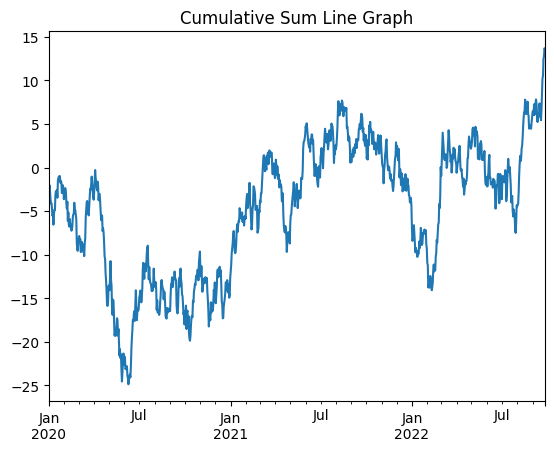

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성

ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2020', periods = 1000))  # randn : 표준정규분포
ts = ts.cumsum()

# 라인 그래프

ts.plot()
plt.title('Cumulative Sum Line Graph')
plt.show()

              A         B
one    0.665428  0.699186
two    0.863716  0.822682
three  0.132947  0.799641
four   0.913501  0.018570
five   0.601444  0.139121 



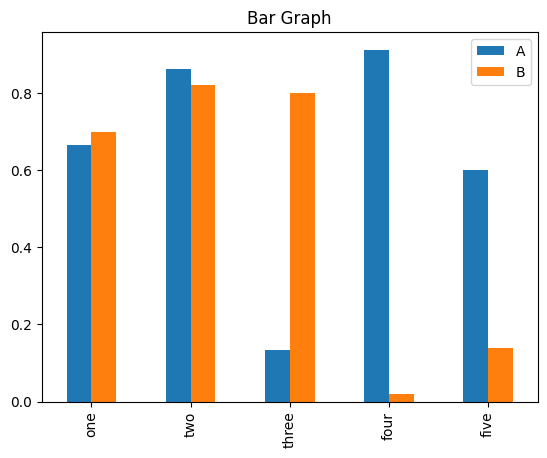

In [ ]:
df = pd.DataFrame({
    'A': np.random.rand(5),
    'B': np.random.rand(5)
}, index = ['one','two','three','four','five'])

print(df,'\n')

# 막대 그래프

df.plot.bar()
plt.title('Bar Graph')
plt.show()

            A         B
0    1.463156 -0.879780
1   -0.465857 -0.880515
2    1.365924 -0.640012
3   -0.694344 -1.376921
4   -1.092087  1.194591
..        ...       ...
995 -1.196970  0.118880
996  0.144098 -1.670374
997 -0.198466  0.381203
998  0.326373  0.148919
999 -0.567878  2.102259

[1000 rows x 2 columns] 



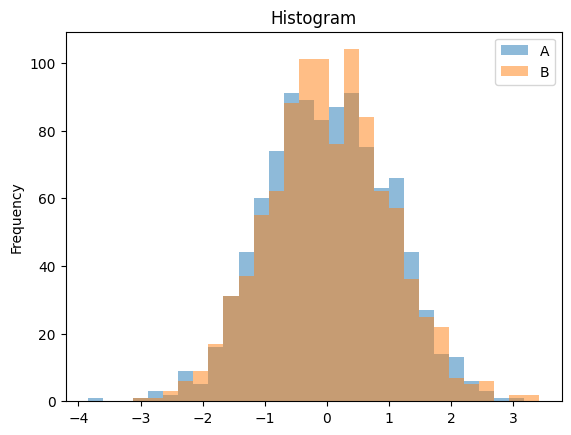

In [ ]:
df = pd.DataFrame({
    'A': np.random.randn(1000),
    'B': np.random.randn(1000)
})

print(df,'\n')

# 히스토그램

df.plot.hist(alpha = 0.5, bins = 30)  # alpha = 투명도 , bins = 구간
plt.title('Histogram')
plt.show()

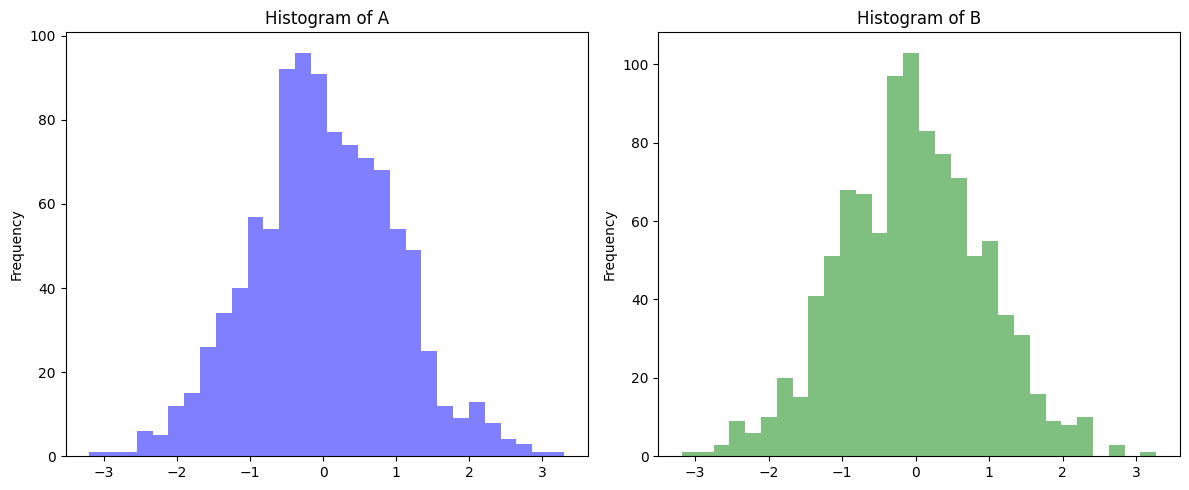

In [ ]:
df = pd.DataFrame({
    'A': np.random.randn(1000),
    'B': np.random.randn(1000)
})


# 그래프의 크기 설정
plt.figure(figsize=(12, 5))

# 첫 번째 히스토그램 (A)
plt.subplot(1, 2, 1)
df['A'].plot.hist(alpha=0.5, bins=30, color='blue')
plt.title('Histogram of A')

# 두 번째 히스토그램 (B)
plt.subplot(1, 2, 2)
df['B'].plot.hist(alpha=0.5, bins=30, color='green')
plt.title('Histogram of B')

# 레이아웃을 조정합니다.
plt.tight_layout()
plt.show()

          A         B         C         D         E
0  0.073925  0.978131  0.062361  0.260607  0.908541
1  0.761409  0.983072  0.254849  0.666439  0.774296
2  0.002183  0.128926  0.535392  0.061299  0.843289
3  0.816679  0.628386  0.720721  0.471698  0.788080
4  0.149522  0.871147  0.700303  0.067750  0.085508
5  0.796733  0.951502  0.248289  0.685514  0.068176
6  0.604841  0.912154  0.516126  0.623676  0.300769
7  0.421986  0.000718  0.976263  0.129176  0.467959
8  0.737460  0.038648  0.357774  0.089088  0.607504
9  0.835969  0.870165  0.468352  0.729574  0.402471 

               A          B          C          D          E
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.520071   0.636285   0.484043   0.378482   0.524659
std     0.331860   0.413795   0.268917   0.284062   0.308575
min     0.002183   0.000718   0.062361   0.061299   0.068176
25%     0.217638   0.253791   0.280580   0.099110   0.326194
50%     0.671151   0.870656   0.492239   0.366153   0.537731

<function matplotlib.pyplot.show(close=None, block=None)>

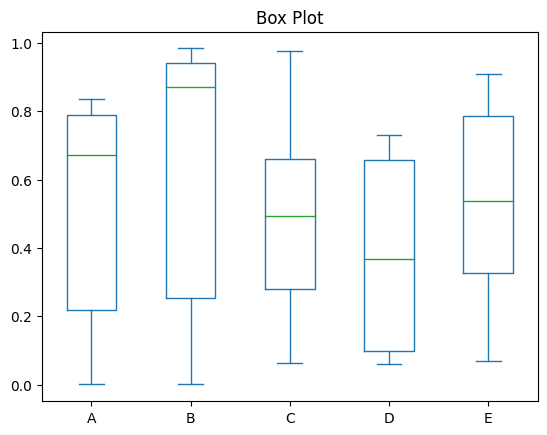

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.rand(10,5), columns = ['A','B','C','D','E'])

# 박스 플롯
df.plot.box()
plt.show

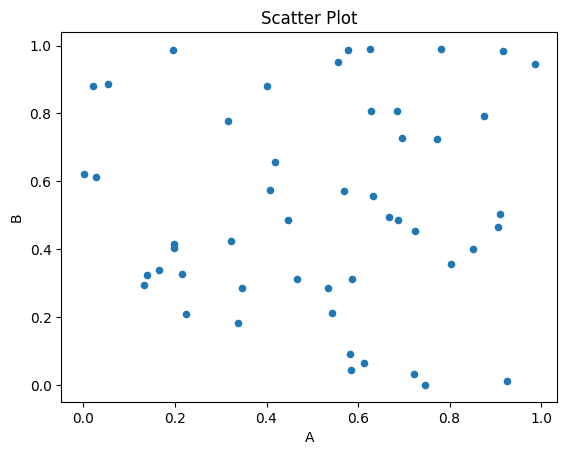

In [ ]:
df = pd.DataFrame(np.random.rand(50,4), columns = ['A','B','C','D'])

# print(df,'\n')

# 산점도

df.plot.scatter(x = 'A', y = 'B')
plt.title('Scatter Plot')
plt.show()

Text(0.5, 0.98, 'Scatter Plot of Positive and Negative Correlation')

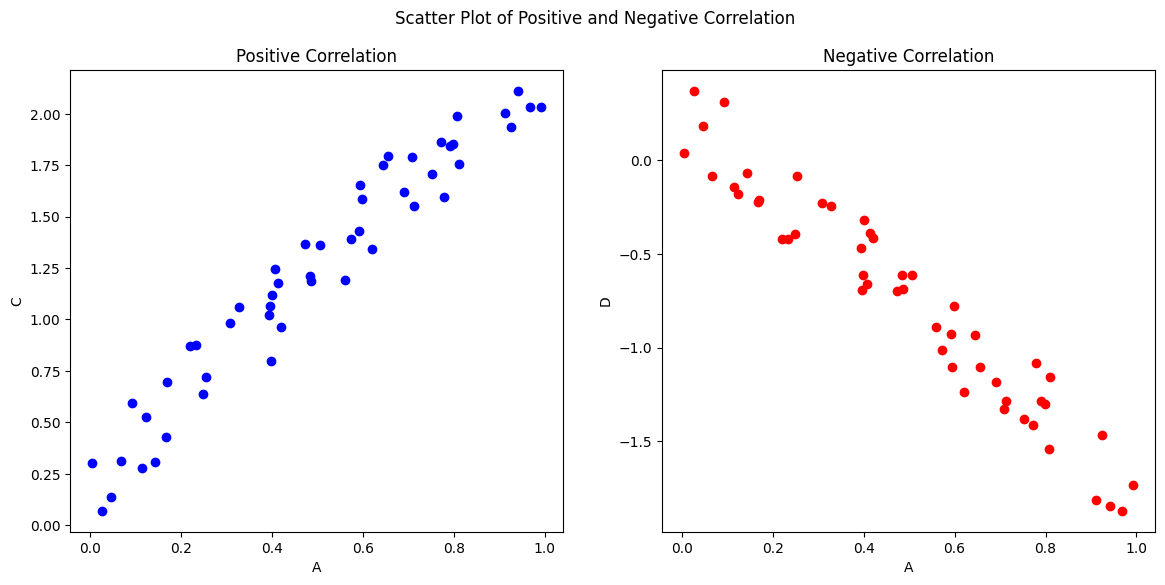

In [ ]:
df = pd.DataFrame(np.random.rand(50,4), columns = ['A','B','C','D'])

# 양의 상관관계

df['C'] = df['A'] * 2 + np.random.rand(50) * 0.5

# 음의 상관관계

df['D'] = -df['A'] * 2 + np.random.rand(50) * 0.5

fig, axs = plt.subplots(1,2, figsize = (14,6))

axs[0].scatter(df['A'], df['C'], color = 'blue')
axs[0].set_title('Positive Correlation')
axs[0].set_xlabel('A')
axs[0].set_ylabel('C')

axs[1].scatter(df['A'], df['D'], color = 'red')
axs[1].set_title('Negative Correlation')
axs[1].set_xlabel('A')
axs[1].set_ylabel('D')

plt.suptitle('Scatter Plot of Positive and Negative Correlation')

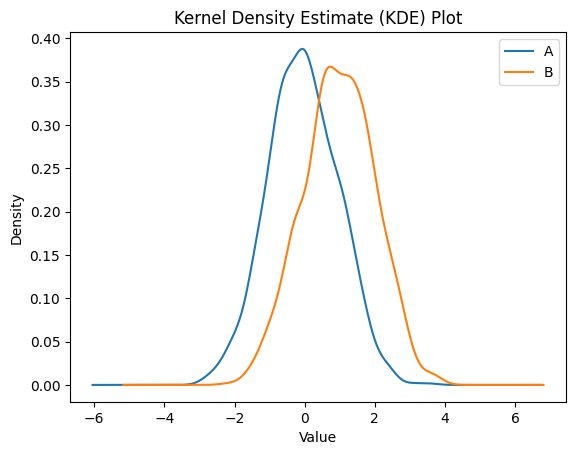

In [ ]:
# 커널 밀도 추정(KDE, Kernel Density Estimate) 그래프는 데이터의 분포를 부드럽게 나타내는 그래프

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성

data = pd.DataFrame({
    'A' : np.random.randn(1000),
    'B' : np.random.randn(1000) + 1
})

# KDE 그래프

data['A'].plot.kde(label = 'A')
data['B'].plot.kde(label = 'B')
plt.title('Kernel Density Estimate (KDE) Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# Q. titanic3 데이터에서 성별과 생존율의 관계를 시각화 하세요.

from google.colab import files

# 파일 업로드

uploaded = files.upload()

Saving titanic3.csv to titanic3.csv


In [ ]:
import pandas as pd

# 데이터프레임 읽기
file_path = '/content/drive/MyDrive/dataset/titanic3.csv'
df = pd.read_csv(file_path)

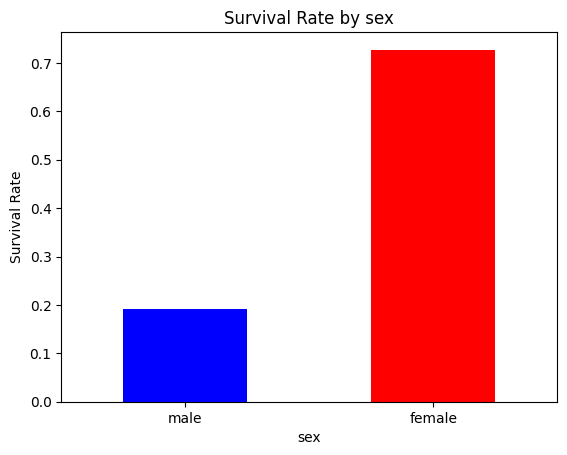

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

survival_by_sex = df.groupby('sex')['survived'].mean().sort_values()

# 시각화

survival_by_sex.plot(kind='bar', color=['blue', 'red'])
plt.title('Survival Rate by sex')
plt.xlabel('sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
# plt.legend()
plt.show()

In [ ]:
# 필요한 열 선택 및 전처리

features = ['pclass', 'sex', 'age', 'sibsp', 'parch','fare', 'embarked']
df = df[features + ['survived']]

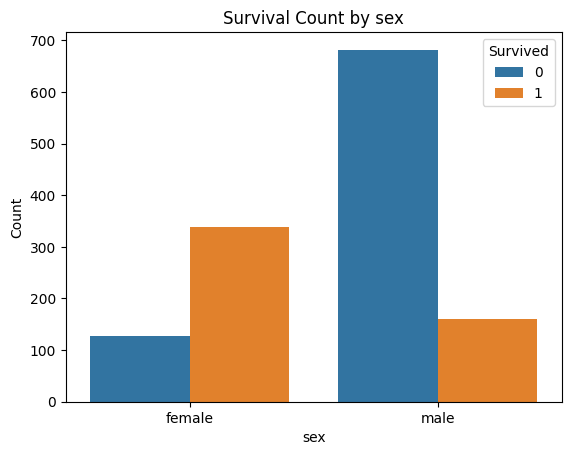

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 성별과 승객(생존,사망) 수 관계 시각화

sns.countplot(x = 'sex', hue = 'survived', data = df)
plt.title('Survival Count by sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.legend(title = 'Survived')
plt.show()

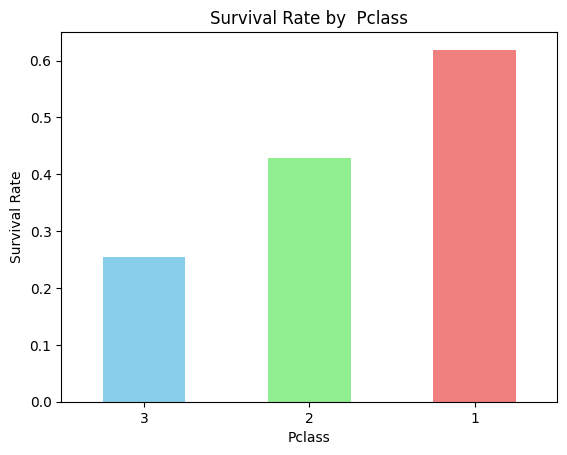

In [ ]:
# Q. 승객 등급과 생존율 관계를 pandas를 이용하여 시각화 하세요.

survival_by_class = df.groupby('pclass')['survived'].mean().sort_values()

# 시각화
survival_by_class.plot(kind='bar', color = ['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Survival Rate by  Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation = 0)
plt.show()

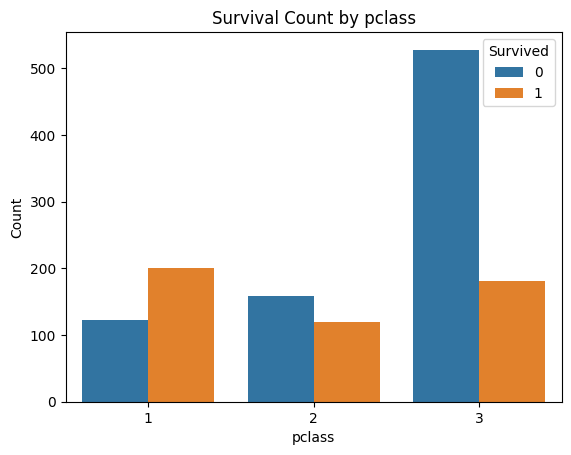

In [ ]:
# 승객 등급과 승객(생존,사망) 수 관계 시각화

sns.countplot(x = 'pclass', hue = 'survived', data = df)
plt.title('Survival Count by pclass')
plt.xlabel('pclass')
plt.ylabel('Count')
plt.legend(title = 'Survived')
plt.show()

age_group
(0, 10]      0.581395
(10, 20]     0.395062
(20, 30]     0.371191
(30, 40]     0.423810
(40, 50]     0.393939
(50, 60]     0.483871
(60, 70]     0.222222
(70, 80]     0.333333
(80, 90]          NaN
(90, 100]         NaN
Name: survived, dtype: float64 



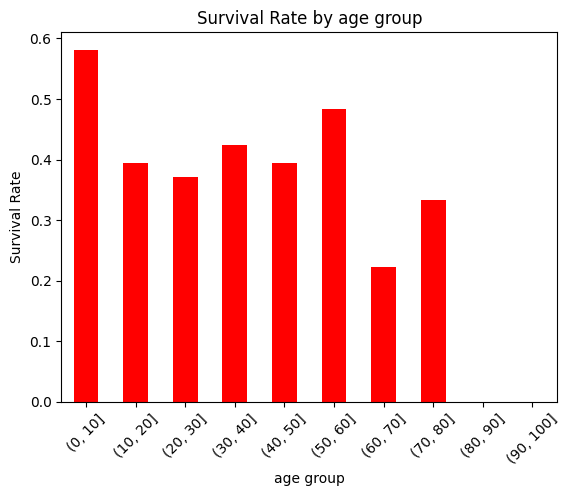

In [ ]:
# Q. 나이와 생존율 관계를 시각화하여 출력하세요.

df['age_group'] = pd.cut(df['age'], bins = [0,10,20,30,40,50,60,70,80,90,100])

# 나이 그룹별 생존율 계산

survived_by_age_group = df.groupby('age_group')['survived'].mean()
print(survived_by_age_group,'\n')

# 시각화

survived_by_age_group.plot(kind='bar', color = 'red')
plt.title('Survival Rate by age group')
plt.xlabel('age group')
plt.ylabel('Survival Rate')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df[df['survived'] == 1].head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived,age_group
0,1,female,29.00,0,0,211.3375,S,1,"(20, 30]"
1,1,male,0.92,1,2,151.5500,S,1,"(0, 10]"
5,1,male,48.00,0,0,26.5500,S,1,"(40, 50]"
6,1,female,63.00,1,0,77.9583,S,1,"(60, 70]"
8,1,female,53.00,2,0,51.4792,S,1,"(50, 60]"


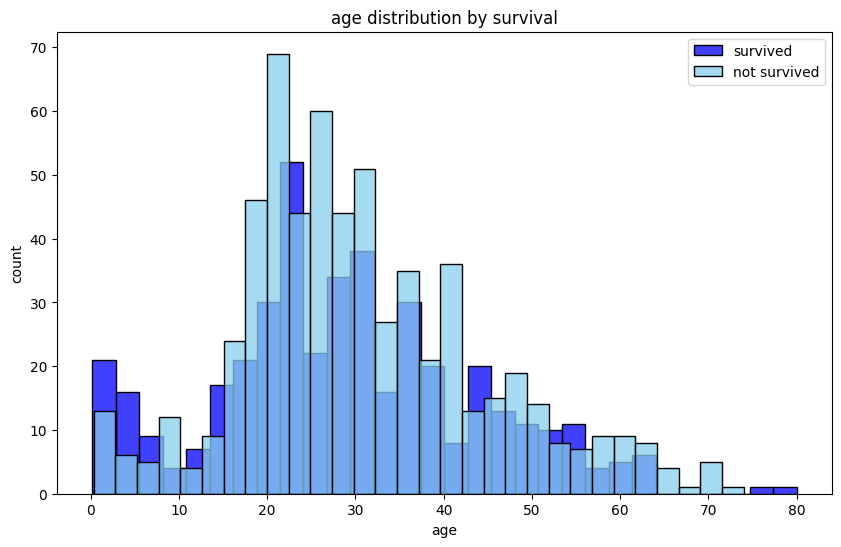

In [ ]:
# 나이와 생존, 사망자수 관계 시각화

plt.figure(figsize = (10,6))
sns.histplot(df[df['survived'] == 1]['age'], bins = 30, kde = False, color = 'blue', label = 'survived')
sns.histplot(df[df['survived'] == 0]['age'], bins = 30, kde = False, color = 'skyblue', label = 'not survived')

plt.title('age distribution by survival')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

In [ ]:
# Q. 요금과 생존율 관계를 Pandas를 이용해 시각화하여 출력하세요.

fare_group
(0, 50]       0.323501
(50, 100]     0.628205
(100, 150]    0.787879
(150, 200]    0.615385
(200, 250]    0.571429
(250, 300]    0.769231
(300, 350]         NaN
(350, 400]         NaN
(400, 450]         NaN
(450, 500]         NaN
Name: survived, dtype: float64 



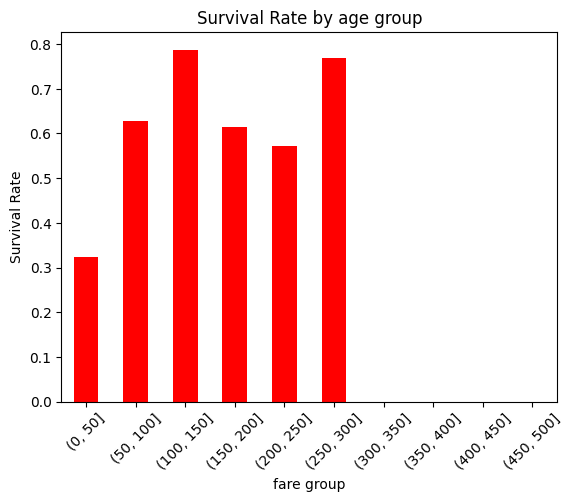

In [ ]:
# 요금과 생존율 관계 계산을 위해 요금을 그룹화

df['fare_group'] = pd.cut(df['fare'], bins = [0,50,100,150,200,250,300,350,400,450,500])

# 요금 그룹별 생존율 계산

survived_by_fare_group = df.groupby('fare_group')['survived'].mean()
print(survived_by_fare_group,'\n')

# 시각화

survived_by_fare_group.plot(kind='bar', color = 'red')
plt.title('Survival Rate by age group')
plt.xlabel('fare group')
plt.ylabel('Survival Rate')
plt.xticks(rotation = 45)
plt.show()

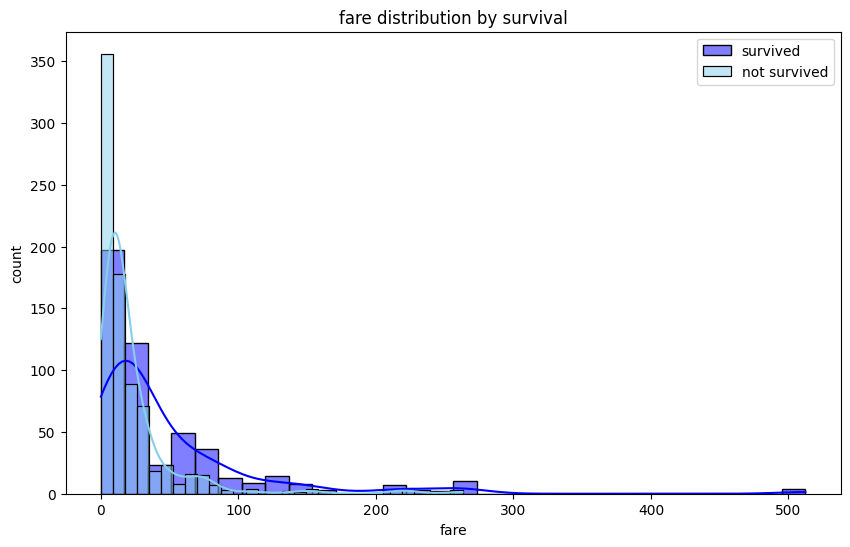

In [ ]:
# 요금과 생존, 사망자수 관계 시각화

plt.figure(figsize = (10,6))
sns.histplot(df[df['survived'] == 1]['fare'], bins = 30, kde = True, color = 'blue', label = 'survived')
sns.histplot(df[df['survived'] == 0]['fare'], bins = 30, kde = True, color = 'skyblue', label = 'not survived')

plt.title('fare distribution by survival')
plt.xlabel('fare')
plt.ylabel('count')
plt.legend()
plt.show()

with_family
0    0.302532
1    0.502890
Name: survived, dtype: float64 



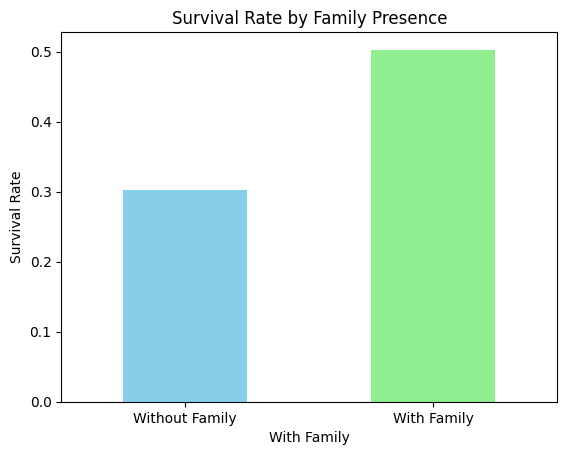

In [ ]:
# Q. 가족 동반 여부와 생존율 관계를 시각화하여 출력하세요.

# 가족 동반 여부를 나타내는 파생 변수 생성
df['with_family'] = (df['sibsp'] + df['parch'] > 0).astype(int)

# 가족 동반 여부에 따른 생존율 계산
survival_by_family = df.groupby('with_family')['survived'].mean()
print(survival_by_family,'\n')

# 시각화
survival_by_family.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Survival Rate by Family Presence')
plt.xlabel('With Family')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Without Family', 'With Family'], rotation=0)
plt.show()

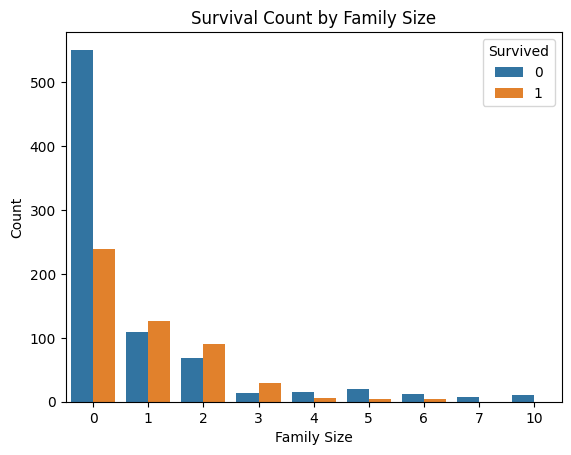

In [ ]:
# 가족 동반 여부와 생존사망자수 관계 시각화
df['family_size'] = df['sibsp'] + df['parch']
sns.countplot(x='family_size', hue='survived', data=df)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

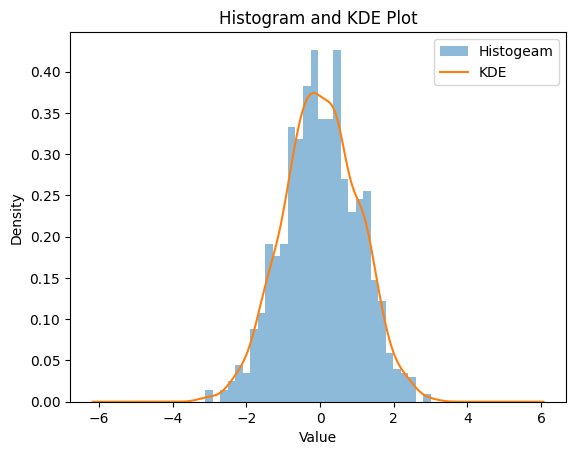

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성

data = pd.Series(np.random.randn(1000))

# 히스토그램과 KDE 같이 그리기

ax = data.plot.hist(bins = 30, alpha = 0.5, density = True, label = 'Histogeam') # 히스토그램
data.plot.kde(ax = ax, label = 'KDE') # KDE 그래프
plt.title('Histogram and KDE Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()